<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Peer Review Final Assignment</font></h1>

## Introduction


In this lab, you will build an image classifier using the VGG16 pre-trained model, and you will evaluate it and compare its performance to the model we built in the last module using the ResNet50 pre-trained model. Good luck!

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>    

1. <a href="#item41">Download Data 
2. <a href="#item42">Part 1</a>
3. <a href="#item43">Part 2</a>  
4. <a href="#item44">Part 3</a>  

</font>
    
</div>

<a id="item41"></a>

## Download Data

Use the <code>wget</code> command to download the data for this assignment from here: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

Use the following cells to download the data.

In [113]:
# !wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/concrete_data_week4.zip

In [114]:
# !unzip concrete_data_week4.zip

After you unzip the data, you fill find the data has already been divided into a train, validation, and test sets.

<a id="item42"></a>

## Part 1

In this part, you will design a classifier using the VGG16 pre-trained model. Just like the ResNet50 model, you can import the model <code>VGG16</code> from <code>keras.applications</code>.

You will essentially build your classifier as follows:
1. Import libraries, modules, and packages you will need. Make sure to import the *preprocess_input* function from <code>keras.applications.vgg16</code>.
2. Use a batch size of 100 images for both training and validation.
3. Construct an ImageDataGenerator for the training set and another one for the validation set. VGG16 was originally trained on 224 × 224 images, so make sure to address that when defining the ImageDataGenerator instances.
4. Create a sequential model using Keras. Add VGG16 model to it and dense layer.
5. Compile the mode using the adam optimizer and the categorical_crossentropy loss function.
6. Fit the model on the augmented data using the ImageDataGenerators.

Use the following cells to create your classifier.

In [2]:
# 1) Importing libraries, modules, packages

import numpy as np
import matplotlib.pyplot as plt

import keras

from keras.models import Sequential
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

from keras.applications import vgg16
from keras.applications.vgg16 import preprocess_input

In [3]:
# 2) Batch size

batch_size_training = 100
batch_size_validation = 100

In [4]:
# 3) construct image data generator (IDG)

image_resize = 224

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
# 3.1) IDG for train set

train_generator = data_generator.flow_from_directory(
    'concrete_data_week4/train',
    target_size = (image_resize, image_resize),
    batch_size = batch_size_training,
    class_mode = 'categorical')


Found 30000 images belonging to 2 classes.


In [6]:
# 3.2) IDG for validation set

validation_generator = data_generator.flow_from_directory(
    'concrete_data_week4/valid',
    target_size = (image_resize, image_resize),
    batch_size = batch_size_validation,
    class_mode = 'categorical')


Found 9500 images belonging to 2 classes.


In [8]:
# 4.1) Create a sequential model using Keras. 

model = Sequential()

In [10]:
# 4.2) Add VGG16 model to it.

model.add(vgg16.VGG16(include_top=False, pooling='avg', weights='imagenet'))

58892288/58889256 [==============================] - 9s 0us/step


In [11]:
# 4.3) Add dense layer

num_classes = 2

model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.layers

In [13]:
model.layers[0].layers

In [14]:
# set VGG16 layer to not be trained

model.layers[0].trainable = False

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
# 5) Compile the mode using the adam optimizer and the categorical_crossentropy loss function.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# 6) Fit the model on the augmented data using the ImageDataGenerators.

steps_per_epoch_training = len(train_generator)
steps_per_epoch_validation = len(validation_generator)
num_epochs = 2

In [18]:
fit_history = model.fit_generator(
    train_generator,
    steps_per_epoch = steps_per_epoch_training,
    epochs = num_epochs,
    validation_data = validation_generator,
    validation_steps = steps_per_epoch_validation,
    verbose = 1,
)

C:\Users\Vishwas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
300/300 [==============================] - 11740s 39s/step - loss: 0.2018 - accuracy: 0.9156 - val_loss: 0.0226 - val_accuracy: 0.9949
Epoch 2/2
300/300 [==============================] - 11494s 38s/step - loss: 0.0199 - accuracy: 0.9955 - val_loss: 0.0137 - val_accuracy: 0.9963


In [19]:
model.save('classifier_vgg16_model.h5')

<a id="item43"></a>

## Part 2

In this part, you will evaluate your deep learning models on a test data. For this part, you will need to do the following:

1. Load your saved model that was built using the ResNet50 model. 
2. Construct an ImageDataGenerator for the test set. For this ImageDataGenerator instance, you only need to pass the directory of the test images, target size, and the **shuffle** parameter and set it to False.
3. Use the **evaluate_generator** method to evaluate your models on the test data, by passing the above ImageDataGenerator as an argument. You can learn more about **evaluate_generator** [here](https://keras.io/models/sequential/).
4. Print the performance of the classifier using the VGG16 pre-trained model.
5. Print the performance of the classifier using the ResNet pre-trained model.


Use the following cells to evaluate your models.

In [20]:
# 1) Load your saved model that was built using the ResNet50 model.

model2 = keras.models.load_model('classifier_resnet_model.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [21]:
# 2) Construct an ImageDataGenerator for the test set.

test_generator = data_generator.flow_from_directory(
    'concrete_data_week4/test',
    target_size = (image_resize, image_resize),
    shuffle = False,
    class_mode = 'categorical' 
)

Found 500 images belonging to 2 classes.


In [22]:
# 3) evaluating models on the test data

# 3.1) evaluation of VGG16 model

evaluate = model.evaluate_generator(
    test_generator,
    verbose = 1,
)

C:\Users\Vishwas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


16/16 [==============================] - 116s 7s/step - loss: 0.0122 - accuracy: 0.9980


In [23]:
# 3.2) evaluation of ResNet50 model

evaluate2 = model2.evaluate_generator(
    test_generator,
    verbose = 1,
)

16/16 [==============================] - 42s 3s/step - loss: 0.0024 - accuracy: 1.0000


In [35]:
# 4) Print the performance of the classifier using the VGG16 pre-trained model.

print('Performance of classifier using VGG16 pre-trained model:')
print('Loss     :',round(evaluate[0],4))
print('Accuracy :',round(evaluate[1],4))

Performance of classifier using VGG16 pre-trained model:
Loss     : 0.0122
Accuracy : 0.998


In [36]:
# 5) Print the performance of the classifier using the ResNet pre-trained model.

print('Performance of classifier using ResNet50 pre-trained model:')
print('Loss     :',round(evaluate2[0],4))
print('Accuracy :',round(evaluate2[1],4))

Performance of classifier using ResNet50 pre-trained model:
Loss     : 0.0024
Accuracy : 1.0


<a id="item44"></a>

## Part 3

In this model, you will predict whether the images in the test data are images of cracked concrete or not. You will do the following:

1. Use the **predict_generator** method to predict the class of the images in the test data, by passing the test data ImageDataGenerator instance defined in the previous part as an argument. You can learn more about the **predict_generator** method [here](https://keras.io/models/sequential/).
2. Report the class predictions of the first five images in the test set. You should print something list this:

<center>
    <ul style="list-style-type:none">
        <li>Positive</li>  
        <li>Negative</li> 
        <li>Positive</li>
        <li>Positive</li>
        <li>Negative</li>
    </ul>
</center>

Use the following cells to make your predictions.

In [37]:
# 1) predict the class of the images in the test data

# 1.1) using VGG16 model

predict = model.predict_generator(
    test_generator,
    verbose = 1,
)

C:\Users\Vishwas\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


16/16 [==============================] - 138s 9s/step


In [38]:
# 1.2) using ResNet50 model

predict2 = model2.predict_generator(
    test_generator,
    verbose = 1,
)

16/16 [==============================] - 45s 3s/step


In [119]:
# 2) Report the class predictions of the first five images in the test set. 

N=5

# 2.1) class predictions using VGG16 model

for i in range(N):
    print('Negative' if predict[i][0]>0.5 else 'Positive')

Negative
Negative
Negative
Negative
Negative


In [120]:
# 2.2) class predictions using ResNet50 model

for i in range(N):
    print('Negative' if predict2[i][0]>0.5 else 'Positive')

Negative
Negative
Negative
Negative
Negative


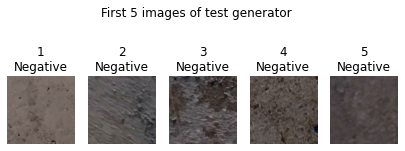

In [121]:
# plotting the first 5 images of test generator to confirm predictions

fig, ax = plt.subplots(1,N, figsize=(7,3))
fig.suptitle('First 5 images of test generator')
images, targets = test_generator[0]
for i in range(N):
    ax[i].imshow(images[i].astype('uint8'))
    title = 'Negative' if targets[i][0]>0.5 else 'Positive'
    ax[i].set_title(str(i+1)+'\n'+title)
    ax[i].axis('off')

In [ ]:
# As we can see, the predictions match the images.

### Thank you for completing this lab!

This notebook was created by Alex Aklson.

This notebook is part of a course on **Coursera** called *AI Capstone Project with Deep Learning*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0321EN_Coursera_Week4_LAB1).

<hr>

Copyright &copy; 2020 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).